In [1]:
from math import *
import numpy as np
import sympy as sy
from sympy import integrate,S

mm=0.001

知识重点
---
1. 计算 $V_{max},M_{max}$
2. $\tau=\frac{V_{}Q_{}}{It}$
3. $\sigma=-\frac{M \cdot y}{I}$
4. 注意 $I,Q$ 是非常容易算错的，一定要检查后再交


题目列表
---
1. T1
2. T2
3. T3
4. T4
5. T5
6. T6
7. T7
8. T8
9. T9

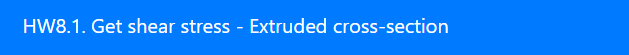

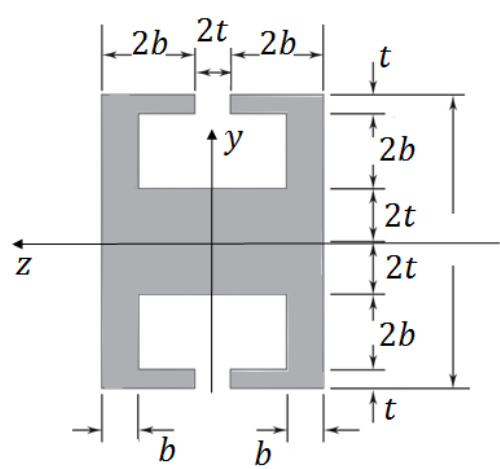

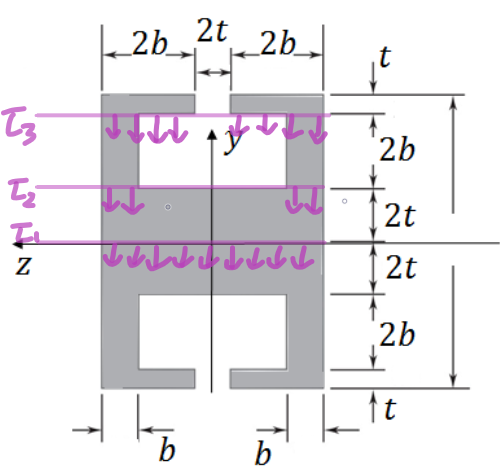

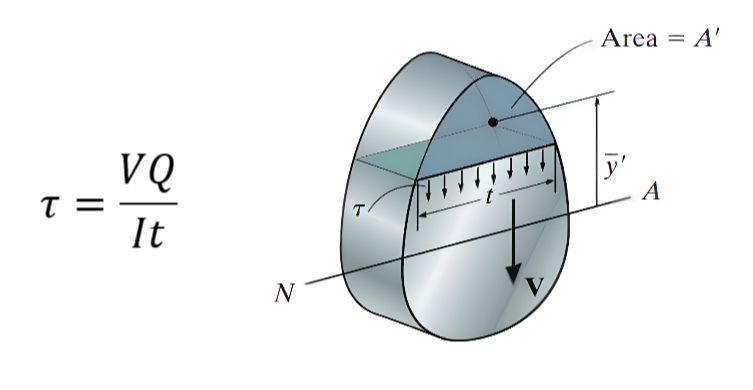

In [2]:
#本题重点
#需要算3个tau，然后比较其中最大的
#对于3个tau，他们的I都是一样的，是整个界面的转动惯量，下面是用积分暴力计算
#对于3个Q，都是从顶上往下看
#对于3个t，看对应Q下的宽度
###################复制部分
b = 25 # mm
t = 7 # mm
Vy = 13 # kN
###################单位转化
b*=mm
t*=mm
Vy*=1000

x,y=S('x,y')

#计算 I 转动惯量 (正确✔)
wide1=4*b+2*t
wide2=2*b
wide3=4*b
I1=integrate(wide1*x*x,[x,0,2*t])*2
I2=integrate(wide2*x*x,[x,2*t,2*t+2*b])*2
I3=integrate(wide3*x*x,[x,2*t+2*b,3*t+2*b])*2
I=I1+I2+I3

#计算 三个Q
    #所需数值
A1=(2*t)*(4*b+2*t)
A2=(2*b)*(2*b)
A3=(t)*(4*b)
y1=t
y2=b+2*t
y3=0.5*t+2*b+2*t
    #计算质心高度
h1=(A1*y1+A2*y2+A3*y3)/(A1+A2+A3)
h2=(A2*y2+A3*y3)/(A2+A3)
h3=(A3*y3)/(A3)
    #计算Q
Q1=(A1+A2+A3)*h1
Q2=(A2+A3)*h2
Q3=(A3)*h3  

#计算 三个tau
tau1=Vy*Q1/(I*(4*b+2*t))  #上到0
tau2=Vy*Q2/(I*2*b)        #上到2b
tau3=Vy*Q3/(I*4*b)        #上到2b+2t

max(tau1,tau2,tau3)/1e6

2.46954047496019

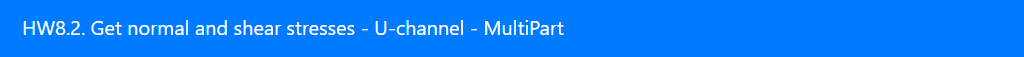

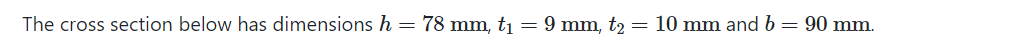

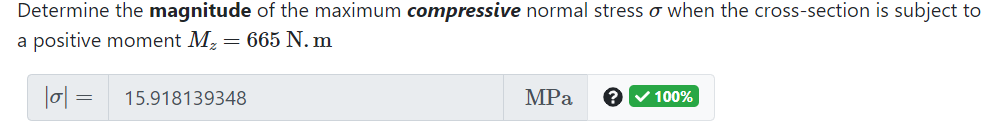

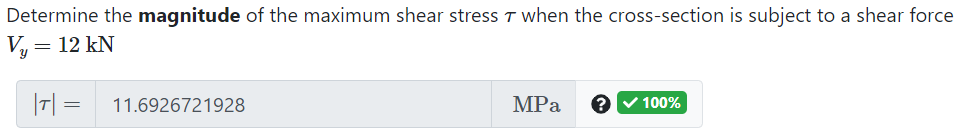

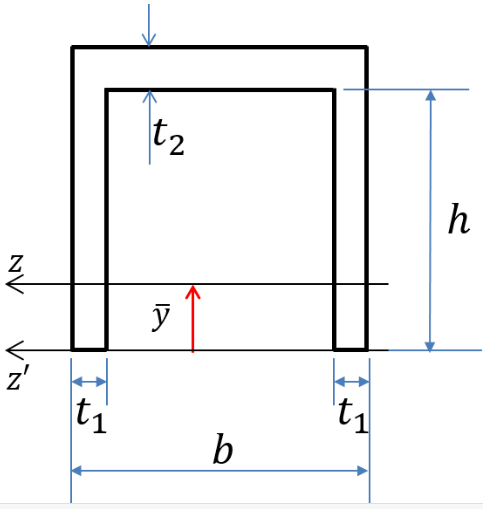

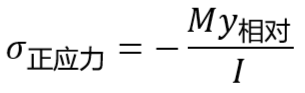

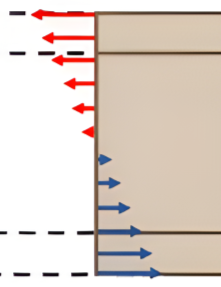

In [17]:
#####################复制部分
t1 = 6 # mm
t2 = 6 # mm
b = 71 # mm
h = 80 # mm
ybar = 53.21645 # mm
Iz = 1058853.06494 # mm^4
Vy = 27 # kN
Mz = 737 # N.m
#####################单位转化
t1=t1*mm
t2=t2*mm
b=b*mm
h=h*mm
ybar=ybar*mm
Iz=Iz*mm**4
Vy*=1000
######################
#情况① 负载为Mz
#计算sigma
sigma1=Mz*(h+t2-ybar)/Iz/1e6  
sigma2=Mz*(ybar)/Iz/1e6     

#情况② 负载为Vy
#计算tau
A1=t2*b
A2=h*t1*2
y1=0.5*t2+h-ybar
y2=(h-ybar)*0.5
y_bar=(A1*y1+A2*y2)/(A1+A2)
Q=(A1+A2)*y_bar

tau1=Q*Vy/Iz/(2*t1)/1e6                   #？？？？？？？？？？？？
tau2=2*t1*ybar*0.5*ybar*Vy/Iz/(2*t1)/1e6 #？？？？？？？？？？？？为什么选这个从下往上算的

key=int(input('compressive 输入1，tensile 输入2'))
if key==1:
    print(sigma1)
if key==2:
    print(sigma2)
print(tau2)

compressive 输入1，tensile 输入21
22.818535592914497
36.10687233105395


In [15]:
tau1,tau2

(54.27926553554127, 36.10687233105395)

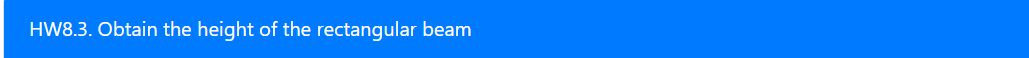

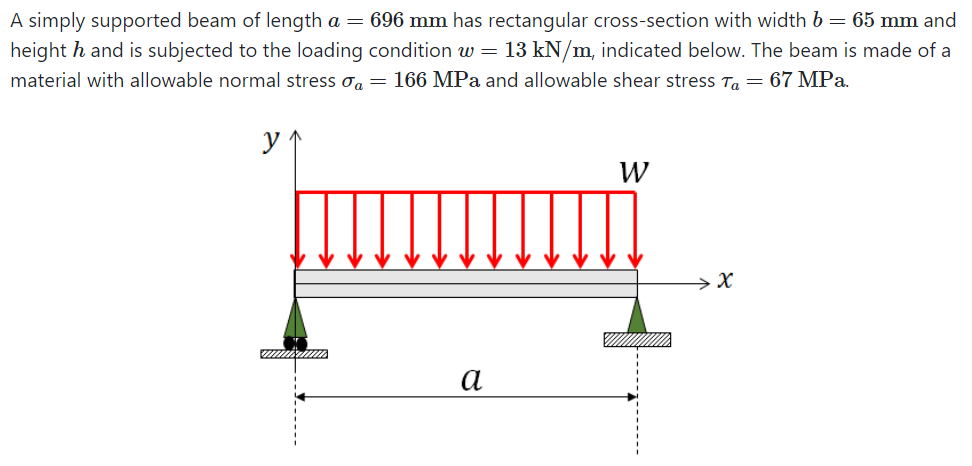

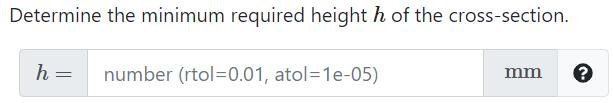

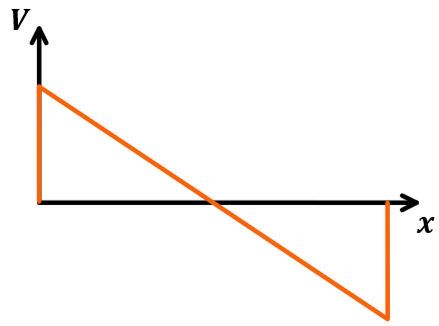

解题思路
---
1. 根据 $h$ 写出转动惯量 $I$
2. 通过 $V-x, M-x$ 图像确定 $V_{max},M_{max}$
2. 计算 $\sigma_{max}=\frac{M_{max} \cdot y}{I},\tau_{max}$ 对于 $h$ 的表达式
3. 根据给出的 $\sigma_{max},\tau_{max}$ 反算 $h$，取较大的 $h$

In [4]:
#本题重点
#找到Vmax和Mmax
######################复制部分
b = 66 # mm
a = 606 # mm
w = 13 # kN/m
sigmaAll = 163 # MPa
tauAll = 60 # MPa
######################单位转化
b*=mm
a*=mm
w*=1000
sigmaAll*=1e6
tauAll*=1e6
######################
Vmax=w*a*0.5
Mmax=w*0.5*a*a*0.5*0.5
h,y=sy.S('h,y')
I=integrate(b*y*y,[y,-0.5*h,0.5*h]) #计算转动惯量

#计算sigma
sigma=(Mmax*h/2)/(I)
h1=sy.solve([sigma-sigmaAll],[h])[1][0]

#计算tau 
Q=1/4*h*b*h/2
tau=Vmax*Q/(I*b)
h2=sy.solve([tau-tauAll],[h])[h]

print(max(h1,h2)/mm)

18.2435420504815


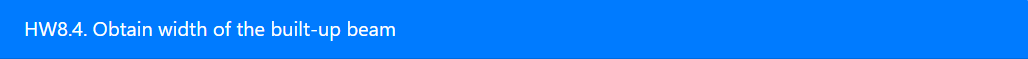

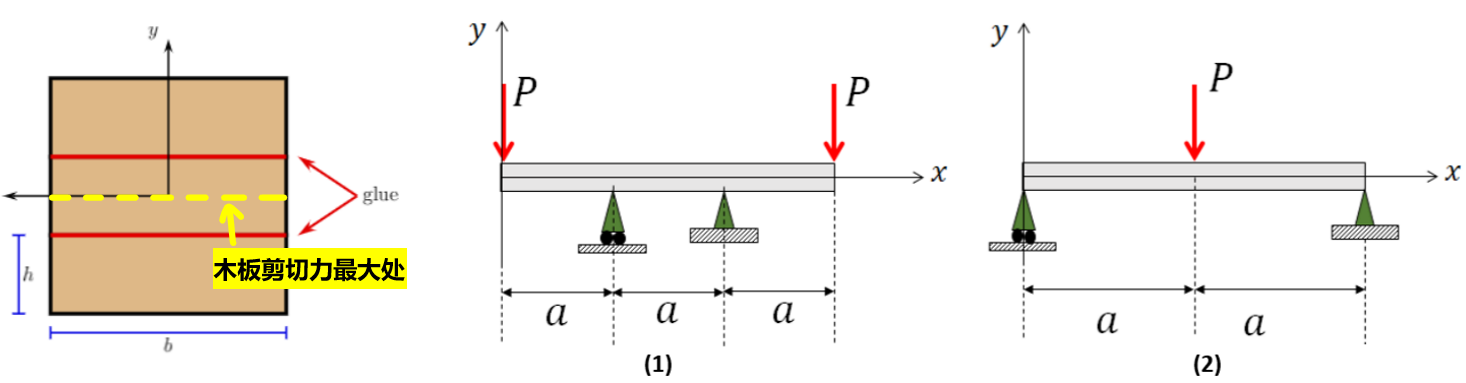

Problem: 已知胶水最大剪应力$\tau_{胶水}$，木板最大剪应力$\tau_{木板}$，h，计算b的最小值?
---

解题思路
---
1. 根据 $h$ 写出转动惯量 $I$
2. 

In [5]:
#以下程序对(1)情况进行解答
#####################复制部分
h = 2 # in
a = 30 # in
P = 4 # kips
s1 = 260 # psi
s2 = 285 # psi
#####################单位转化
p=P*1000
#计算最大剪切力+最大力矩
Vmax=p
Mmax=p*a
#计算tau剪切力
b,x=sy.S('b,x')
I=integrate(b*x*x,[x,-1.5*h,1.5*h])
Q1=1.5*h*b*1.5/2*h  #计算木板断裂处剪切力
Q2=h*b*h            #计算胶水断裂处剪切力

tau1=Vmax*Q1/b/I
tau2=Vmax*Q2/b/I
sigma=1.5*h*Mmax/I  #计算木板断裂处正应力

key=int(input('木板给出最大正应力输入1，剪切力输入2='))
if key==1:
    unknow=sigma
else:
    unknow=tau1

b1=sy.solve([unknow-s1],[b])[b]
b2=sy.solve([tau2-s2],[b])[b]

print(max(b1,b2))

木板给出最大正应力输入1，剪切力输入2=1
76.9230769230769


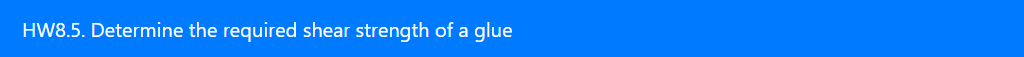

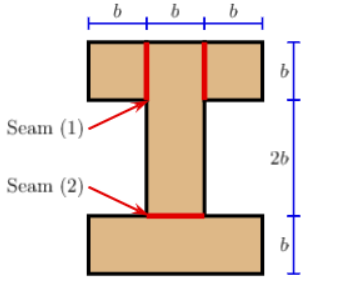

In [6]:
b = 50 # mm
V = 8 # kN

b*=mm
V*=1000

r=S('r')

#计算转动惯量
I1=integrate(b*r*r,[r,-b,b])
I2=integrate(3*b*r*r,[r,b,2*b])*2
I=I1+I2

Q1=(b*b)*(1.5*b)   #左侧小方块❗❗❗❗
Q2=(b*b*3)*(1.5*b)+0

thick1=b
thick2=b

tau1=V*Q1/I/thick1
tau2=V*Q2/I/thick2

tau1/1000000,tau2/1000000

(0.327272727272727, 0.981818181818182)

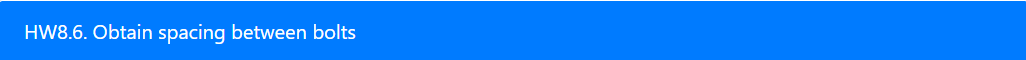

**已知 $V_{剪切力},h,t,d_{钉子直径}$ 计算$\Delta s_{钉子距离}$**
  
**解题思路**  
$$\bar y=\frac{m1 \cdot y1+m2 \cdot y2+m3 \cdot y3}{m1+m2+m3}$$  
$$I=2\cdot \int_{0-\bar y}^{h- \bar y}{t \cdot r^2 dr}+\int_{\frac{h}{2}-\bar y}^{\frac{3h}{2}- \bar y}{t \cdot r^2 dr}$$  

$$Q=(h \cdot t) \cdot (\frac{h}{2}- \bar y)$$  

$$q=\frac{VQ}{I}=F\cdot \Delta s$$

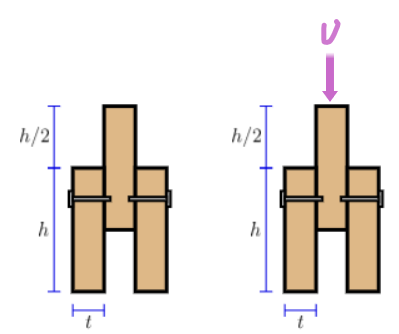

In [7]:
h = 196 # mm
t = 41 # mm
d = 13 # mm
taub = 3 # MPa
V = 4 # kN

h*=mm
t*=mm
d*=mm
taub*=1000000
V*=1000
#############################################################
r=sy.S('r')

m1=h*t
m2=h*t
m3=h*t
y1=0.5*h
y2=h
y3=0.5*h

ybar=(m1*y1+m2*y2+m3*y3)/(m1+m2+m3)

#计算转动惯量
I1=integrate(t*r*r,[r,0-ybar,h-ybar])
I2=integrate(t*r*r,[r,0.5*h-ybar,1.5*h-ybar])
I3=integrate(t*r*r,[r,0-ybar,h-ybar])
I=I1+I2+I3


Q=(t*h)*(0.5*h-ybar)

q=V*Q/I
S=pi*(d/2)**2
F=taub*S

abs(float(F/q)/mm)

48.77911643320707

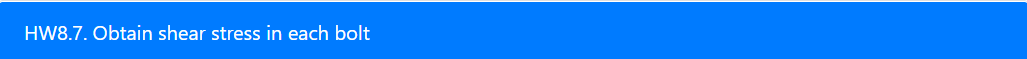

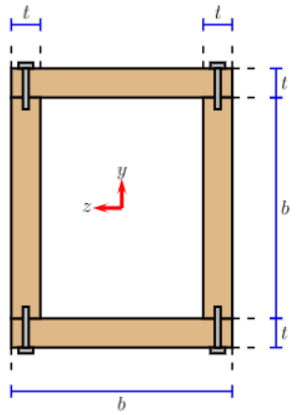

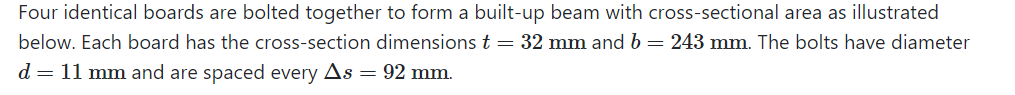

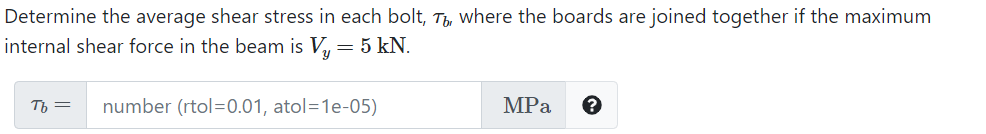

In [8]:
#####################复制部分
b = 243 # mm
t = 32 # mm
d = 11 # mm
deltaS = 92 # mm
Vy = 5 # kN
#####################单位转化
b*=mm;t*=mm;d*=mm;deltaS*=mm;Vy*=1000
#####################
x=sy.S('x')
S=pi*(d/2)**2

#计算I
I=integrate(2*t*x*x,[x,-0.5*b,0.5*b])+integrate(b*x*x,[x,0.5*b,0.5*b+t])*2

Q=(t*b)*(0.5*b+0.5*t) 

#计算q
q=Q*Vy/I

tau_ave=q*deltaS/(4*S)*2
tau_ave/1e6

6.95830291287543

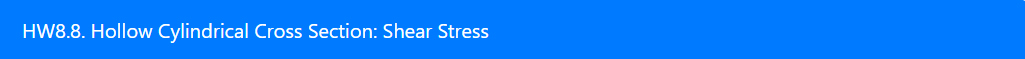

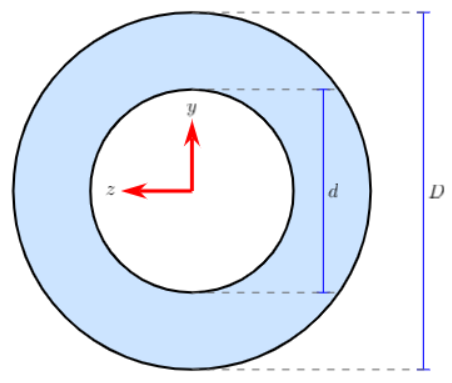

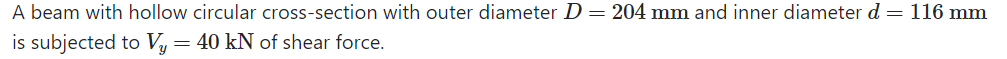

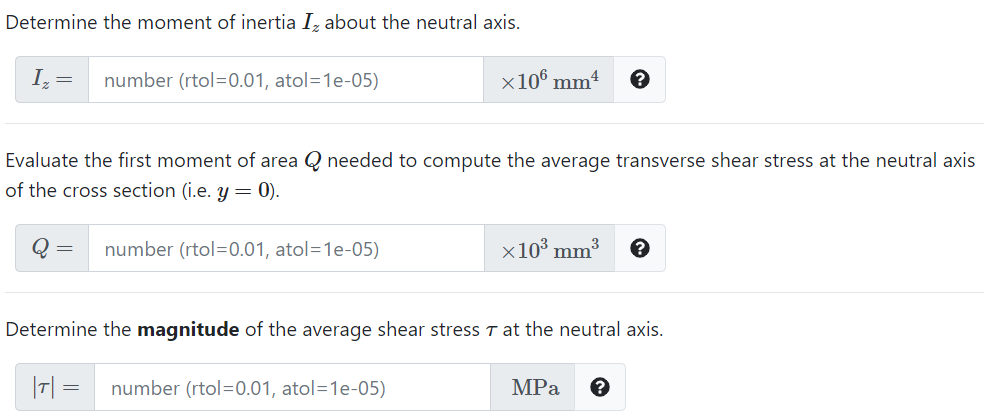

In [9]:
#############复制部分
D = 204 # mm
d = 116 # mm
V = 40 # kN
#############单位转化
do=D*mm;di=d*mm;V=V*1000;ro=do/2;ri=di/2
#############
x,y=sy.S('x,y')


I=pi/4*(ro**4-ri**4)
Q=(1/3*(ro**3)-(1/3*ri**3))*2  #这里是手算出来的积分表达式❗❗❗❗❗❗❗
t=(do-di)

tau=V*Q/I/t

print('I=',I/mm**4/1e6)
print('Q=',Q/mm**3/1e3)
print('tau=',tau/1e6)

I= 76.12606787213872
Q= 577.3973333333334
tau= 3.4476144725371833


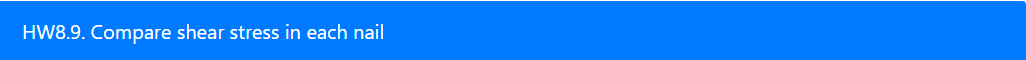

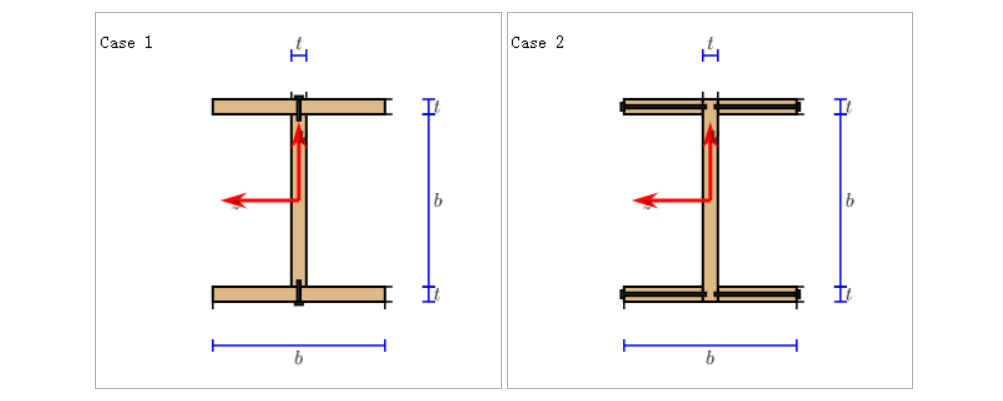

In [10]:
from sympy import *

b = 41 # in
t = 7 # in
d = 0.67 # in
deltaS = 64 # in
Vmax = 5 # lb
#############################复制部分
qmax=Vmax/deltaS

r,V1,V2=sy.S('r,V1,V2')

#计算转动惯量
I1=integrate(b*r*r,[r,0.5*b,0.5*b+t])*2
I2=integrate(t*r*r,[r,-0.5*b,0.5*b])
I=I1+I2

#对①分析
Q1=t*b*(0.5*t+0.5*b)
q1=V1*Q1/I

#对②分析
Q2=t*(b-t)/2*(0.5*t+0.5*b)
q2=V2*Q2/I

ans=solve([qmax-q1,qmax-q2],[V1,V2])

I/1000,ans

(373.171750000000, {V1: 4.23258463541667, V2: 10.2079982383578})